# **NAME : BACHAN NAYAK**
# **DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPJANUARY**
## BEGINNER LEVEL TASK 2: 

## **Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


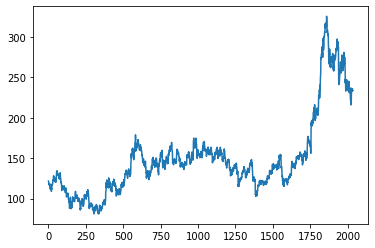

In [9]:
plt.plot(df['Close'])

In [10]:
df1=df['Close']

## **PREPARING DATA**

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [12]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1424, 611)

In [14]:
def create_dataset(dataset, timestep=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1): 
            a = dataset[i:(i+time_step), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **MODEL BUILDING**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   
model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 22s 534ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 6s 338ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/60
19/19 [==============================] - 6s 322ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 4s 224ms/step - loss: 9.2937e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 3s 175ms/step - loss: 9.1703e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 3s 177ms/step - loss: 8.7137e-04 - val_loss: 0.0013
Epoch 7/60
19/19 [==============================] - 3s 174ms/step - loss: 8.5530e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 177ms/step - loss: 8.4268e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 3s 176ms/step - loss: 7.9608e-04 - val_loss: 0.0011
Epoch 10/60
19/19 [==============================] - 3s 173ms/step - loss: 

In [22]:
test_predict=model.predict(X_test)

In [23]:
test_predict1=scaler.inverse_transform(test_predict)

In [24]:
test_predict1

array([[142.73044 ],
       [142.85265 ],
       [142.03018 ],
       [139.49338 ],
       [137.63863 ],
       [137.1824  ],
       [138.5537  ],
       [140.36392 ],
       [140.78189 ],
       [139.98315 ],
       [139.23593 ],
       [140.20723 ],
       [141.45992 ],
       [143.29993 ],
       [145.5597  ],
       [143.9389  ],
       [140.99435 ],
       [140.1091  ],
       [141.10822 ],
       [146.32889 ],
       [151.37523 ],
       [153.48596 ],
       [152.91    ],
       [150.13235 ],
       [149.57695 ],
       [150.28871 ],
       [151.6136  ],
       [153.49356 ],
       [154.05038 ],
       [153.41527 ],
       [153.14816 ],
       [152.07925 ],
       [149.17218 ],
       [143.75778 ],
       [140.0681  ],
       [139.29416 ],
       [139.96336 ],
       [139.40776 ],
       [136.70772 ],
       [132.41795 ],
       [129.39166 ],
       [128.39374 ],
       [127.143166],
       [126.56398 ],
       [124.79042 ],
       [122.10272 ],
       [120.956024],
       [120.6

In [25]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.027952450991398585